# **Lets Grow More Virtual Internship Program** 

## **Beginner Level Task**

## **Task 2 - Stock Market Prediction And Forecasting Using Stacked LSTM**

## **Batch - December 2021, Data Science**

### **By Joel Ayappa**


### Importing the libraries and loading the dataset

In [1]:
# Importing Libraries needed to perform task
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading and Reading The Data Set
data=pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [4]:
df=data.reset_index()
df

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...,...
2030,2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


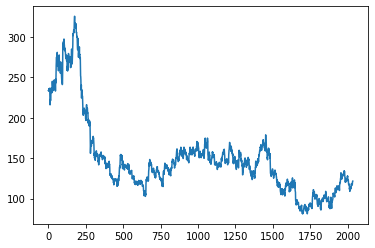

In [5]:
# Close value graph
d_close = df['Close']
plt.plot(d_close)

In [6]:
# LSTM are sensitive to the scale of the data so we apply MinMax scaler where we tranfer the values between 0 to 1.
# We reshape so that we can use fit transform.

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
d_close=scaler.fit_transform(np.array(d_close).reshape(-1,1))
d_close

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [7]:
# Splitting into testing data and training data
training_size=int(len(d_close)*0.65)
test_size=len(d_close)-training_size
train_data,test_data=d_close[0:training_size,:],d_close[training_size:len(d_close),:1]

In [8]:
# Size of trainng and testing data
training_size, test_size

(1322, 713)

### Data Preprocessing

In [9]:
# Converting an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        return np.array(dataX), np.array(dataY)
  

In [10]:
# We have considered 100 timestep for better prediction
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [11]:
print(X_train)

[[0.62418301 0.62214052 0.62622549 0.63378268 0.62234477 0.62765523
  0.62888072 0.62949346 0.63582516 0.625      0.57883987 0.55167484
  0.57618464 0.58006536 0.57230392 0.57781863 0.58312908 0.63623366
  0.62642974 0.63337418 0.62745098 0.62254902 0.6376634  0.61294935
  0.63112745 0.65196078 0.67075163 0.66196895 0.64705882 0.63970588
  0.62745098 0.62336601 0.63868464 0.63480392 0.63991013 0.64767157
  0.62785948 0.63112745 0.63194444 0.67790033 0.65870098 0.65890523
  0.64603758 0.63705065 0.67544935 0.66319444 0.6439951  0.62152778
  0.64419935 0.68198529 0.6629902  0.72691993 0.75265523 0.77144608
  0.79166667 0.79370915 0.75714869 0.77736928 0.80208333 0.81719771
  0.7495915  0.76960784 0.74754902 0.75428922 0.76143791 0.74979575
  0.73999183 0.72406046 0.73488562 0.76021242 0.79411765 0.78104575
  0.80412582 0.77062908 0.76245915 0.74652778 0.75980392 0.76041667
  0.75490196 0.74673203 0.7120098  0.74468954 0.7689951  0.74979575
  0.72120098 0.73406863 0.72263072 0.70894608 0.

In [12]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

### Training the Model

In [13]:
# Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [14]:
# Adding layers in LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
1/1 [==============================] - 43s 43s/step - loss: 0.8300 - val_loss: 0.0832
Epoch 2/100
1/1 [==============================] - 0s 418ms/step - loss: 0.6609 - val_loss: 0.0561
Epoch 3/100
1/1 [==============================] - 0s 346ms/step - loss: 0.5093 - val_loss: 0.0318
Epoch 4/100
1/1 [==============================] - 0s 292ms/step - loss: 0.3616 - val_loss: 0.0113
Epoch 5/100
1/1 [==============================] - 0s 393ms/step - loss: 0.2157 - val_loss: 2.0125e-04
Epoch 6/100
1/1 [==============================] - 0s 361ms/step - loss: 0.0850 - val_loss: 0.0115
Epoch 7/100
1/1 [==============================] - 0s 356ms/step - loss: 0.0057 - val_loss: 0.0658
Epoch 8/100
1/1 [==============================] - 0s 409ms/step - loss: 0.0277 - val_loss: 0.1345
Epoch 9/100
1/1 [==============================] - 0s 304ms/step - loss: 0.0988 - val_loss: 0.1536
Epoch 10/100
1/1 [==============================] - 0s 402ms/step - loss: 0.1078 - val_loss: 0.1299
Epoch 

1/1 [==============================] - 0s 295ms/step - loss: 1.7780e-05 - val_loss: 0.0766
Epoch 82/100
1/1 [==============================] - 0s 320ms/step - loss: 3.4710e-06 - val_loss: 0.0776
Epoch 83/100
1/1 [==============================] - 0s 238ms/step - loss: 2.4052e-07 - val_loss: 0.0785
Epoch 84/100
1/1 [==============================] - 0s 354ms/step - loss: 6.5882e-06 - val_loss: 0.0792
Epoch 85/100
1/1 [==============================] - 0s 321ms/step - loss: 1.7158e-05 - val_loss: 0.0796
Epoch 86/100
1/1 [==============================] - 0s 242ms/step - loss: 2.5712e-05 - val_loss: 0.0797
Epoch 87/100
1/1 [==============================] - 0s 397ms/step - loss: 2.8046e-05 - val_loss: 0.0796
Epoch 88/100
1/1 [==============================] - 0s 255ms/step - loss: 2.3553e-05 - val_loss: 0.0791
Epoch 89/100
1/1 [==============================] - 0s 331ms/step - loss: 1.4875e-05 - val_loss: 0.0785
Epoch 90/100
1/1 [==============================] - 0s 255ms/step - loss: 6.1

In [16]:
# Prediction
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

# Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [17]:
# Training Data RMSE
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

293.506749371298

In [18]:
# Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

227.92109251333997

### Predict the test data and plot the output

In [19]:
# shift train predictions for plotting
look_back = 100
train_predict_plot = np.empty_like(d_close)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict)+look_back, :] = train_predict

In [20]:
# shift test predictions for plotting
test_predict_plot = np.empty_like(d_close)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(look_back*2)+1:len(d_close)-1, :] = test_predict

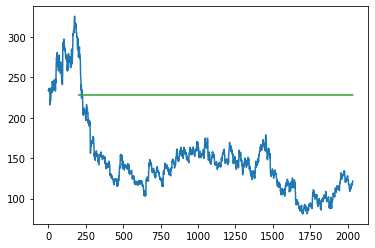

In [21]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(d_close))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()

In [22]:
len(test_data)

713

In [23]:
x_input = test_data[613:].reshape(1,-1)
x_input.shape

(1, 100)

In [24]:
# Convert all the input of x_input into a lists and extract previous 100 data from test_data
temp_input=list(x_input) 
temp_input=temp_input[0].tolist()
temp_input

[0.12479575163398693,
 0.1384803921568627,
 0.14011437908496732,
 0.1388888888888889,
 0.13541666666666663,
 0.14011437908496732,
 0.13807189542483655,
 0.130718954248366,
 0.130718954248366,
 0.12867647058823528,
 0.11846405228758167,
 0.14644607843137253,
 0.1480800653594771,
 0.159109477124183,
 0.15992647058823523,
 0.1578839869281045,
 0.16441993464052285,
 0.178921568627451,
 0.17933006535947704,
 0.19260620915032678,
 0.2081290849673203,
 0.18974673202614378,
 0.18055555555555558,
 0.1823937908496731,
 0.17708333333333326,
 0.17810457516339862,
 0.18055555555555558,
 0.17810457516339862,
 0.17851307189542487,
 0.196078431372549,
 0.18913398692810457,
 0.1895424836601307,
 0.19403594771241828,
 0.19444444444444442,
 0.20200163398692816,
 0.19771241830065356,
 0.19934640522875813,
 0.19873366013071891,
 0.19975490196078427,
 0.21282679738562094,
 0.21568627450980393,
 0.2044526143790849,
 0.21772875816993464,
 0.21098856209150318,
 0.21425653594771243,
 0.1975081699346406,
 0.1881

In [25]:
# Demonstrate prediction for next 50 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<50):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.45831352]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0

8 day output [[0.5318368]]
9 day input [0.12867647 0.11846405 0.14644608 0.14808007 0.15910948 0.15992647
 0.15788399 0.16441993 0.17892157 0.17933007 0.19260621 0.20812908
 0.18974673 0.18055556 0.18239379 0.17708333 0.17810458 0.18055556
 0.17810458 0.17851307 0.19607843 0.18913399 0.18954248 0.19403595
 0.19444444 0.20200163 0.19771242 0.19934641 0.19873366 0.1997549
 0.2128268  0.21568627 0.20445261 0.21772876 0.21098856 0.21425654
 0.19750817 0.18811275 0.17851307 0.17381536 0.16033497 0.16564542
 0.17116013 0.17422386 0.18035131 0.17401961 0.16278595 0.16973039
 0.17810458 0.17034314 0.16830065 0.17279412 0.17544935 0.18382353
 0.19138072 0.18913399 0.19097222 0.17238562 0.16830065 0.1693219
 0.17177288 0.16156046 0.14971405 0.1503268  0.15196078 0.14726307
 0.14501634 0.14603758 0.12479575 0.13112745 0.11397059 0.1190768
 0.12377451 0.13562092 0.12908497 0.13459967 0.12806373 0.13031046
 0.12724673 0.13521242 0.14522059 0.15257353 0.14848856 0.14338235
 0.14562908 0.15236928 0.1

17 day output [[0.67971635]]
18 day input [0.17933007 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379
 0.17708333 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843
 0.18913399 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242
 0.19934641 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261
 0.21772876 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307
 0.17381536 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131
 0.17401961 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065
 0.17279412 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222
 0.17238562 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405
 0.1503268  0.15196078 0.14726307 0.14501634 0.14603758 0.12479575
 0.13112745 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497
 0.13459967 0.12806373 0.13031046 0.12724673 0.13521242 0.14522059
 0.15257353 0.14848856 0.14338235 0.14562908 0.15236928 0.15400327
 0.14971405 0.1621732  0.16319444 0.16584967 0.45831352 0.46019298
 0.46407804 0.470290

 0.73617107 0.74894547 0.76118189 0.77288491]
25 day output [[0.7840615]]
26 day input [0.18055556 0.17810458 0.17851307 0.19607843 0.18913399 0.18954248
 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641 0.19873366
 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876 0.21098856
 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536 0.16033497
 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961 0.16278595
 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412 0.17544935
 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562 0.16830065
 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268  0.15196078
 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745 0.11397059
 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967 0.12806373
 0.13031046 0.12724673 0.13521242 0.14522059 0.15257353 0.14848856
 0.14338235 0.14562908 0.15236928 0.15400327 0.14971405 0.1621732
 0.16319444 0.16584967 0.45831352 0.46019298 0.46407804 0.47029048
 0.47886372 0.48962656 0.50228238 0.5164749

33 day output [[0.8558584]]
34 day input [0.20200163 0.19771242 0.19934641 0.19873366 0.1997549  0.2128268
 0.21568627 0.20445261 0.21772876 0.21098856 0.21425654 0.19750817
 0.18811275 0.17851307 0.17381536 0.16033497 0.16564542 0.17116013
 0.17422386 0.18035131 0.17401961 0.16278595 0.16973039 0.17810458
 0.17034314 0.16830065 0.17279412 0.17544935 0.18382353 0.19138072
 0.18913399 0.19097222 0.17238562 0.16830065 0.1693219  0.17177288
 0.16156046 0.14971405 0.1503268  0.15196078 0.14726307 0.14501634
 0.14603758 0.12479575 0.13112745 0.11397059 0.1190768  0.12377451
 0.13562092 0.12908497 0.13459967 0.12806373 0.13031046 0.12724673
 0.13521242 0.14522059 0.15257353 0.14848856 0.14338235 0.14562908
 0.15236928 0.15400327 0.14971405 0.1621732  0.16319444 0.16584967
 0.45831352 0.46019298 0.46407804 0.47029048 0.47886372 0.48962656
 0.50228238 0.51647496 0.53183681 0.5480212  0.56472087 0.58167571
 0.59867424 0.61554956 0.63217419 0.64845276 0.66431648 0.67971635
 0.69461942 0.70900369

 0.88151008 0.88702905 0.89222264 0.89710706]
41 day output [[0.90169734]]
42 day input [0.21772876 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307
 0.17381536 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131
 0.17401961 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065
 0.17279412 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222
 0.17238562 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405
 0.1503268  0.15196078 0.14726307 0.14501634 0.14603758 0.12479575
 0.13112745 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497
 0.13459967 0.12806373 0.13031046 0.12724673 0.13521242 0.14522059
 0.15257353 0.14848856 0.14338235 0.14562908 0.15236928 0.15400327
 0.14971405 0.1621732  0.16319444 0.16584967 0.45831352 0.46019298
 0.46407804 0.47029048 0.47886372 0.48962656 0.50228238 0.51647496
 0.53183681 0.5480212  0.56472087 0.58167571 0.59867424 0.61554956
 0.63217419 0.64845276 0.66431648 0.67971635 0.69461942 0.70900369
 0.72285646 0.73617107 0.74894547 0.76118

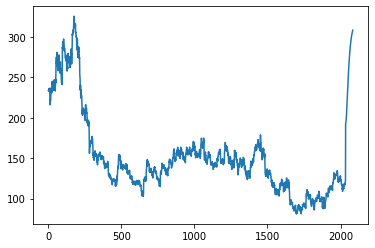

In [26]:
df = d_close.tolist()
df.extend(lst_output)
df=scaler.inverse_transform(df).tolist()
plt.plot(df)